In [6]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [7]:
# Data Loading
marketing = pd.read_csv('marketing.csv')

marketing=marketing.drop(['Unnamed: 0'], axis=1)
marketing.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [8]:
# Cheking null values
marketing.isnull().sum()*100/marketing.shape[0]

youtube      0.0
facebook     0.0
newspaper    0.0
sales        0.0
dtype: float64

In [9]:
# Cheking basic statistics
marketing.describe().round(3) 

,youtube,facebook,newspaper,sales
count,200.000,200.000,200.000,200.000
mean,176.451,27.917,36.665,16.827
std,103.025,17.816,26.134,6.261
min,0.840,0.000,0.360,1.920
25%,89.250,11.970,15.300,12.450
50%,179.700,27.480,30.900,15.480
75%,262.590,43.830,54.120,20.880
max,355.680,59.520,136.800,32.400


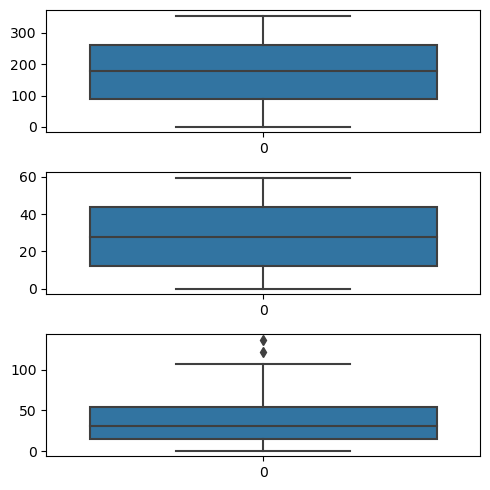

In [10]:
# Outliers analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(marketing['youtube'], ax = axs[0])
plt2 = sns.boxplot(marketing['facebook'], ax = axs[1])
plt3 = sns.boxplot(marketing['newspaper'], ax = axs[2])
plt.tight_layout()

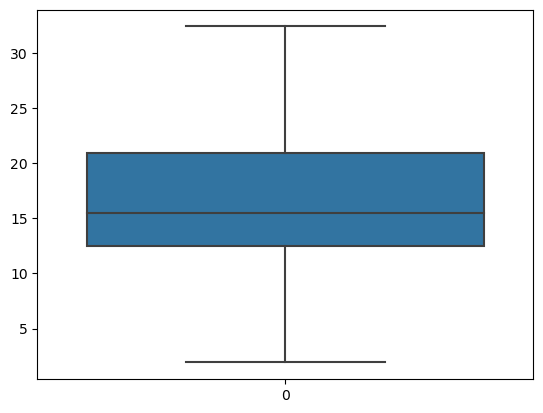

In [11]:
sns.boxplot(marketing['sales'])
plt.show()

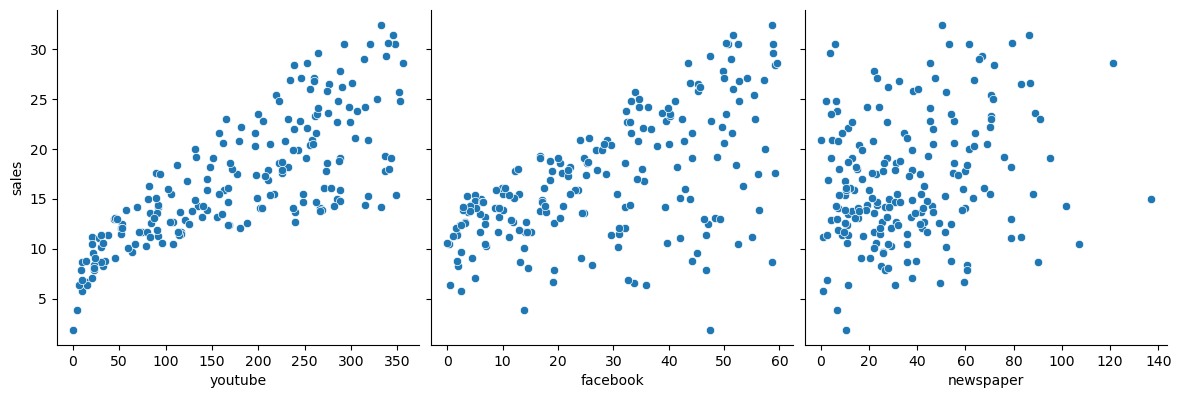

In [12]:
# Checking sales are related with other variables
sns.pairplot(marketing, x_vars=['youtube', 'facebook', 'newspaper'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

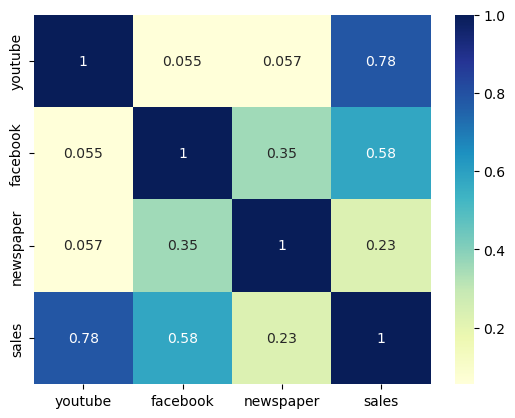

In [13]:
# Correlations
#sns.heatmap(marketing.corr(), cmap='YlGnB', annot = True)
sns.heatmap(marketing.corr(), cmap="YlGnBu", annot = True)
plt.show()

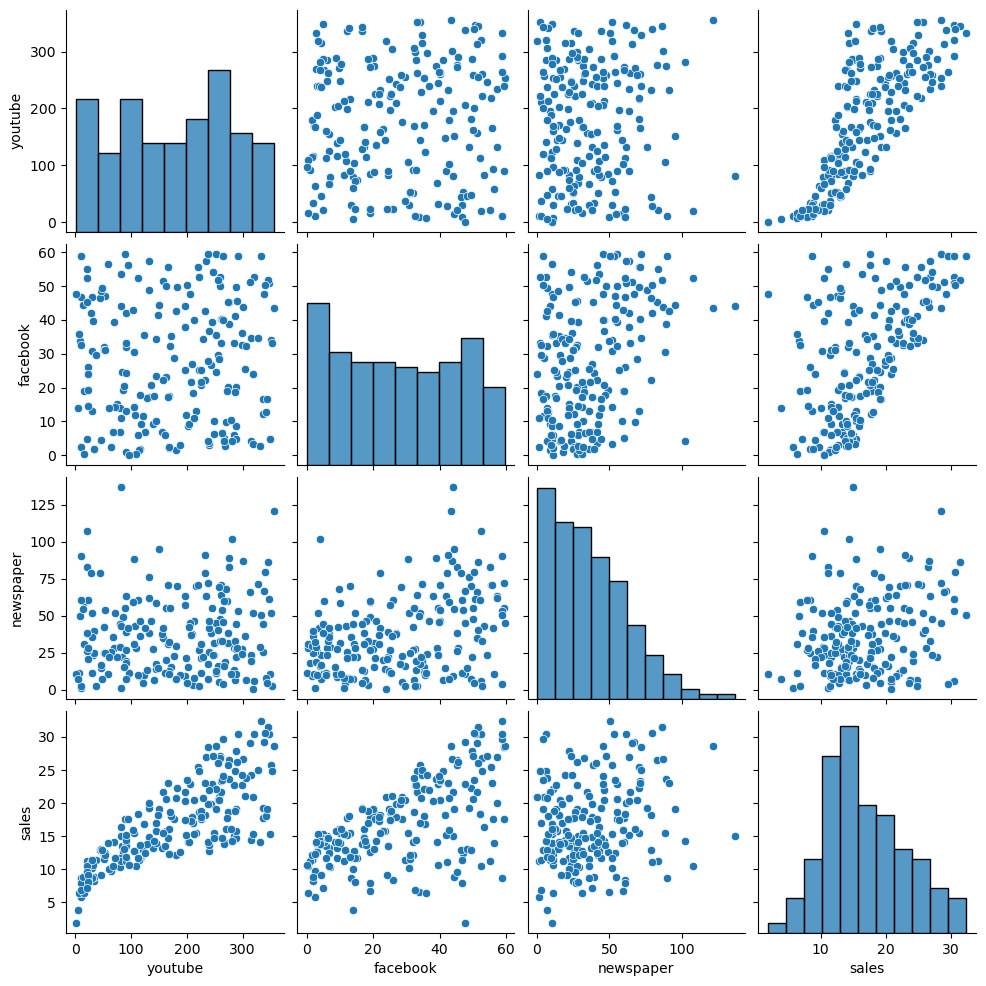

In [14]:
# plot numerical data as pairs
sns.pairplot(marketing[['youtube','facebook','newspaper', 'sales']]);


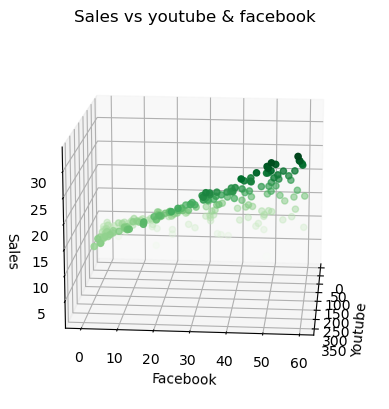

In [15]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
z = marketing[ 'sales']
x = marketing['youtube']
y = marketing['facebook']
#ax.plot3D(x, y, z, 'gray')
ax.set_title('Sales vs youtube & facebook');
ax.view_init(15, 5) # elevation & azimut
ax.set_xlabel('Youtube')
ax.set_ylabel('Facebook')
ax.set_zlabel('Sales')
ax.scatter3D(x, y, z, c=z, cmap='Greens');

In [16]:
import statsmodels.api as sm
X = marketing[['youtube','facebook','newspaper']]
y = marketing['sales']

df= marketing[['youtube','facebook','newspaper', 'sales']]

In [17]:
# Add a constant to get an intercept
X_sm = sm.add_constant(X)


In [18]:
# Fit the resgression line using ‘OLS’
model = sm.OLS(y, X_sm).fit()

# Alternative way

#from statsmodels.formula.api import ols
#model = ols("sales ~ youtube+facebook+newspaper", data=df).fit()

In [19]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        12:42:30   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

In [20]:
# Estimation error
# ===========================================

prediction_train = model.predict(exog = X_sm)
residuals_train   = y-prediction_train

y_train=y;
X_train= X_sm

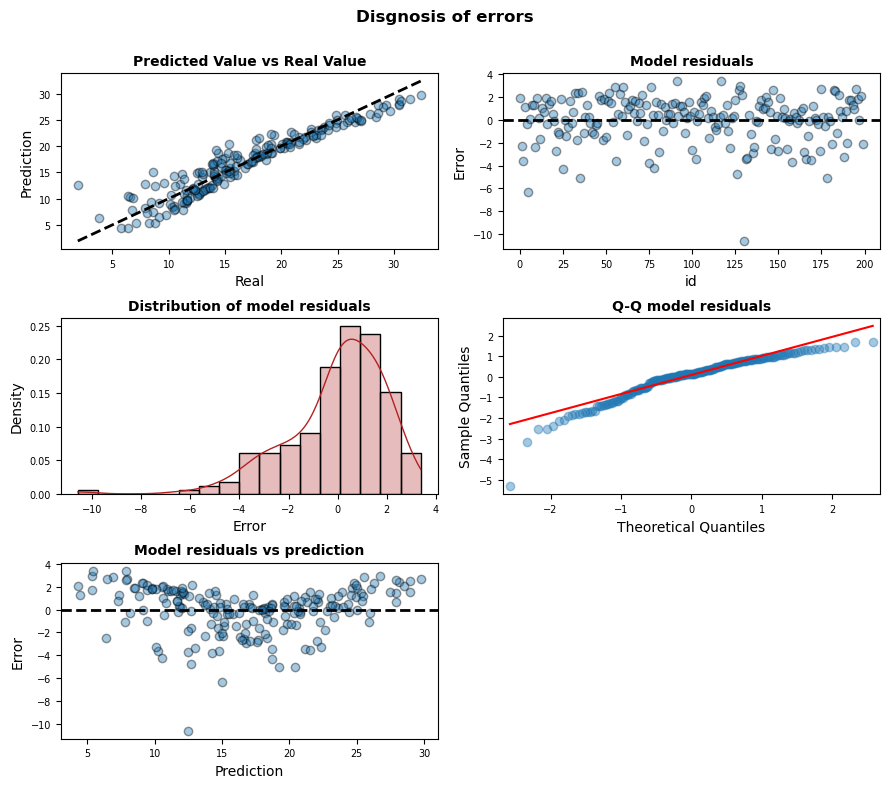

In [21]:
# Graphics
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Disgnosis of errors', fontsize = 12, fontweight = "bold");

In [22]:
# Obtaining influencial point
influence = model.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum.head())



   dfb_const  dfb_youtube  dfb_facebook  dfb_newspaper   cooks_d  \
0  -0.085588     0.058118      0.023312       0.101385  0.005797   
1  -0.033412     0.105538     -0.078916      -0.029579  0.006674   
2  -0.001981     0.218867     -0.134762      -0.184090  0.033828   
3  -0.024405    -0.001968      0.031368       0.035180  0.001230   
4  -0.000892    -0.004626      0.017298      -0.020697  0.000181   

   standard_resid  hat_diag  dffits_internal  student_resid    dffits  
0        0.947054  0.025203         0.152280       0.946804  0.152240  
1       -1.161042  0.019418        -0.163384      -1.162079 -0.163530  
2       -1.820490  0.039226        -0.367846      -1.831389 -0.370048  
3        0.539752  0.016610         0.070147       0.538774  0.070020  
4       -0.173316  0.023509        -0.026892      -0.172887 -0.026825  


Examples with higher Cook distance [130   5  75  35 178]


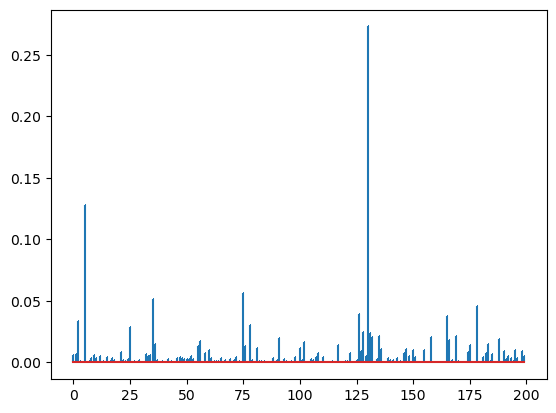

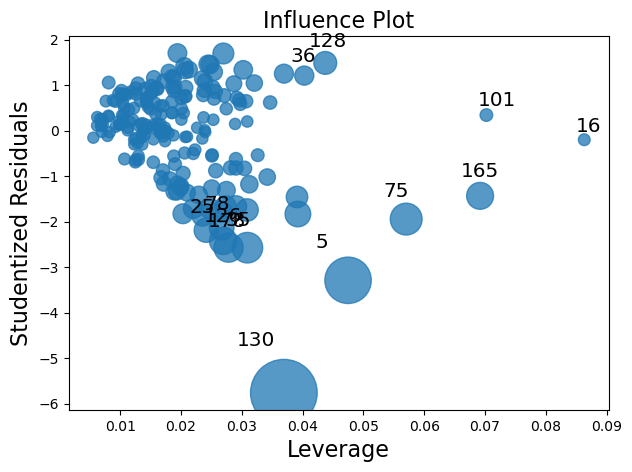

In [23]:
#' ## Cooks distance

influence = model.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

#PLotting Cook distance:
plt.stem(np.arange(len(c)), c, markerfmt=",")

# samples with higher coolk distancve
idx = (-c).argsort()[:5]

print("Examples with higher Cook distance", idx)


# Plotting influence graphic

#In statsmodels .influence_plot the influence of each point can be visualized by the criterion keyword argument. 
#Options are Cook’s distance and DFFITS, two measures of influence. 

#Steps to compute Cook’s distance:

#Delete observations one at a time.
#Refit the regression model on remaining (n−1) observations
#Examine how much all of the fitted values change when the ith observation is deleted.
fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

#To identify values with high influence, we look for observations with:

#big blue points (high Cook’s distance) and
#high leverage (X-axis) which additionally have
#high or low studentized residuals (Y-axis).


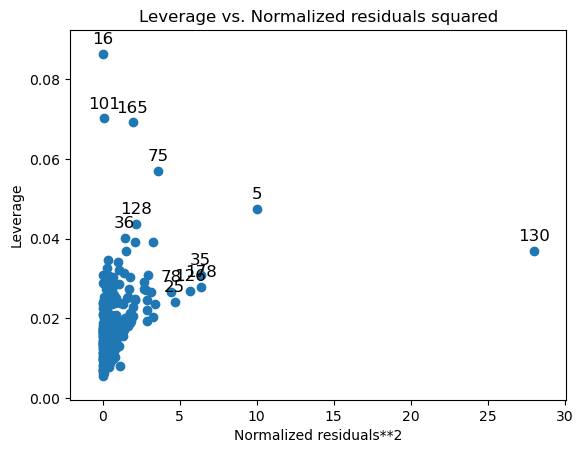

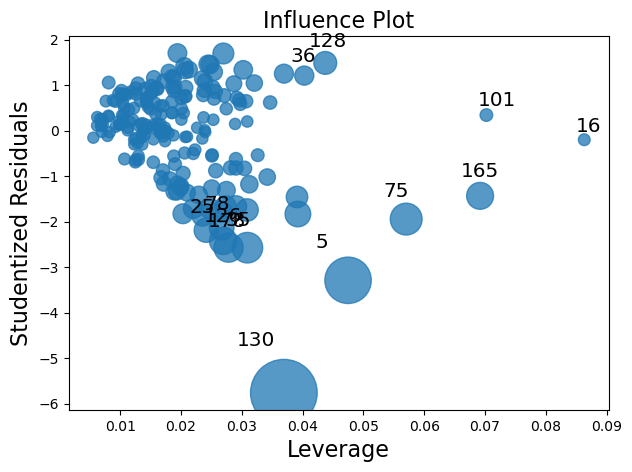

In [24]:
# Leverage plots
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(model)
#influence_plot(model)


fig = sm.graphics.influence_plot(model, criterion="cooks")
fig.tight_layout(pad=1.0)

In [25]:
#Removing variable newspaper

Xnew = marketing[['youtube','facebook']]
ynew = marketing['sales']



In [26]:
# Add a constant to get an intercept
Xnew_sm = sm.add_constant(Xnew)


In [27]:
# Fit the resgression line using ‘OLS’
modelnew = sm.OLS(ynew, Xnew_sm).fit()



In [28]:
print(modelnew.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):           4.83e-98
Time:                        12:42:31   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5053      0.353      9.919      0.0

In [29]:
#Removing outlier case 130

marketing_sim =marketing
marketing_sim=marketing_sim.drop(index=130)



In [30]:
#Removing variable newspaper

Xnews = marketing_sim[['youtube','facebook']]
ynews = marketing_sim['sales']

print(len(Xnews))

199


In [31]:
# Add a constant to get an intercept
Xnews_sm = sm.add_constant(Xnews)


In [32]:
# Fit the resgression line using ‘OLS’
modelnew_2 = sm.OLS(ynews, Xnews_sm).fit()



In [33]:
print(modelnew_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     982.2
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          7.18e-103
Time:                        12:42:31   Log-Likelihood:                -405.71
No. Observations:                 199   AIC:                             817.4
Df Residuals:                     196   BIC:                             827.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6226      0.329     11.022      0.0

Examples with higher Cook distance [  5  35 177 126  75]


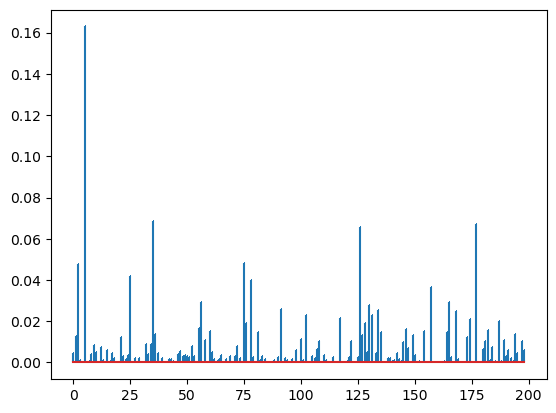

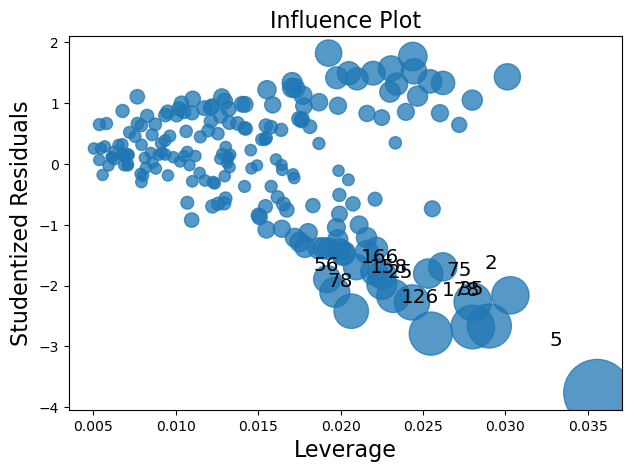

In [34]:
#' ## Cooks distance

influence = modelnew_2.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

#PLotting Cook distance:
plt.stem(np.arange(len(c)), c, markerfmt=",")

# samples with higher coolk distancve
idx = (-c).argsort()[:5]

print("Examples with higher Cook distance", idx)


# Plotting influence graphic

#In statsmodels .influence_plot the influence of each point can be visualized by the criterion keyword argument. 
#Options are Cook’s distance and DFFITS, two measures of influence. 

#Steps to compute Cook’s distance:

#Delete observations one at a time.
#Refit the regression model on remaining (n−1) observations
#Examine how much all of the fitted values change when the ith observation is deleted.
fig = sm.graphics.influence_plot(modelnew_2, criterion="cooks")
fig.tight_layout(pad=1.0)

#To identify values with high influence, we look for observations with:

#big blue points (high Cook’s distance) and
#high leverage (X-axis) which additionally have
#high or low studentized residuals (Y-axis).


In [35]:
# Estimation error
# ===========================================

prediction_train = modelnew_2.predict(exog = Xnews_sm)
residuals_train   = ynews-prediction_train

y_train=ynews
X_train=Xnews

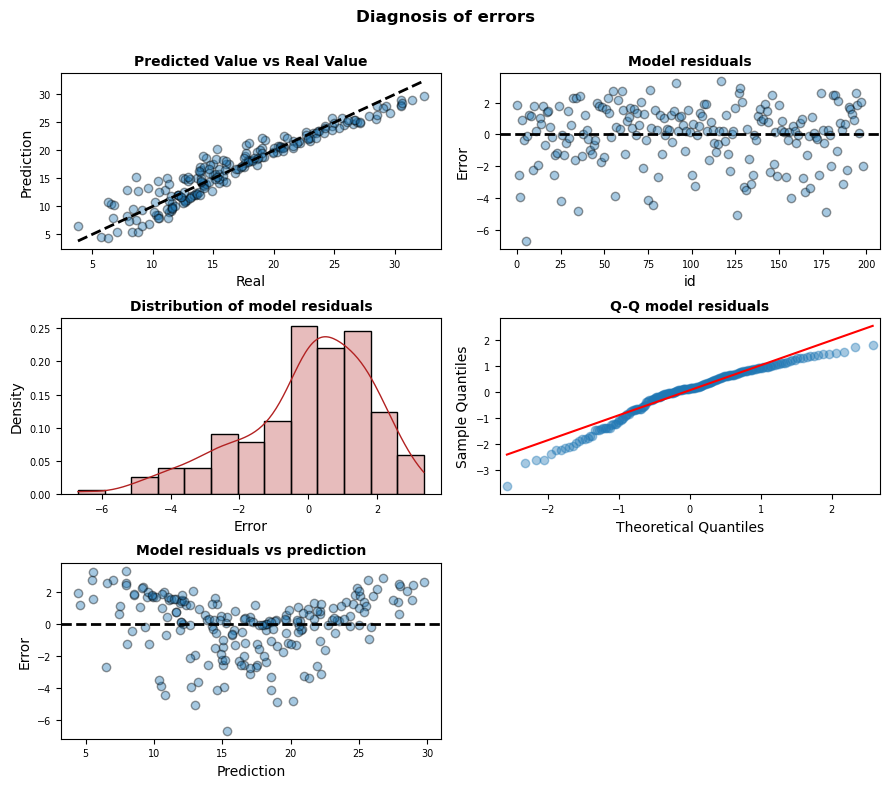

In [36]:
# Graphics
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnosis of errors', fontsize = 12, fontweight = "bold");

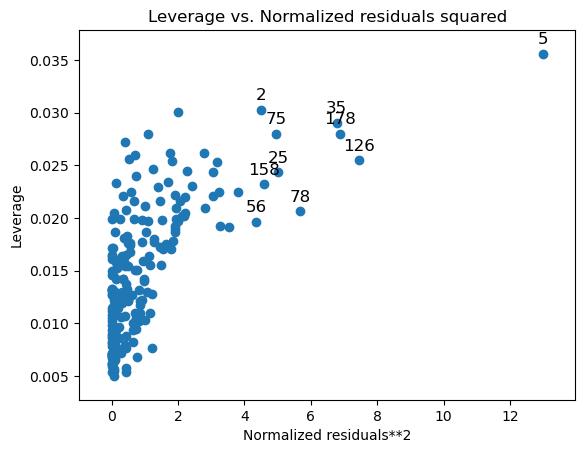

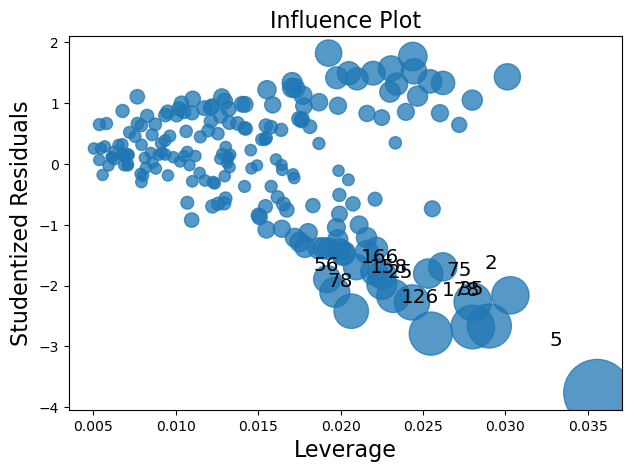

In [37]:
# Leverage plots
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(modelnew_2)
#influence_plot(model)


fig = sm.graphics.influence_plot(modelnew_2, criterion="cooks")
fig.tight_layout(pad=1.0)

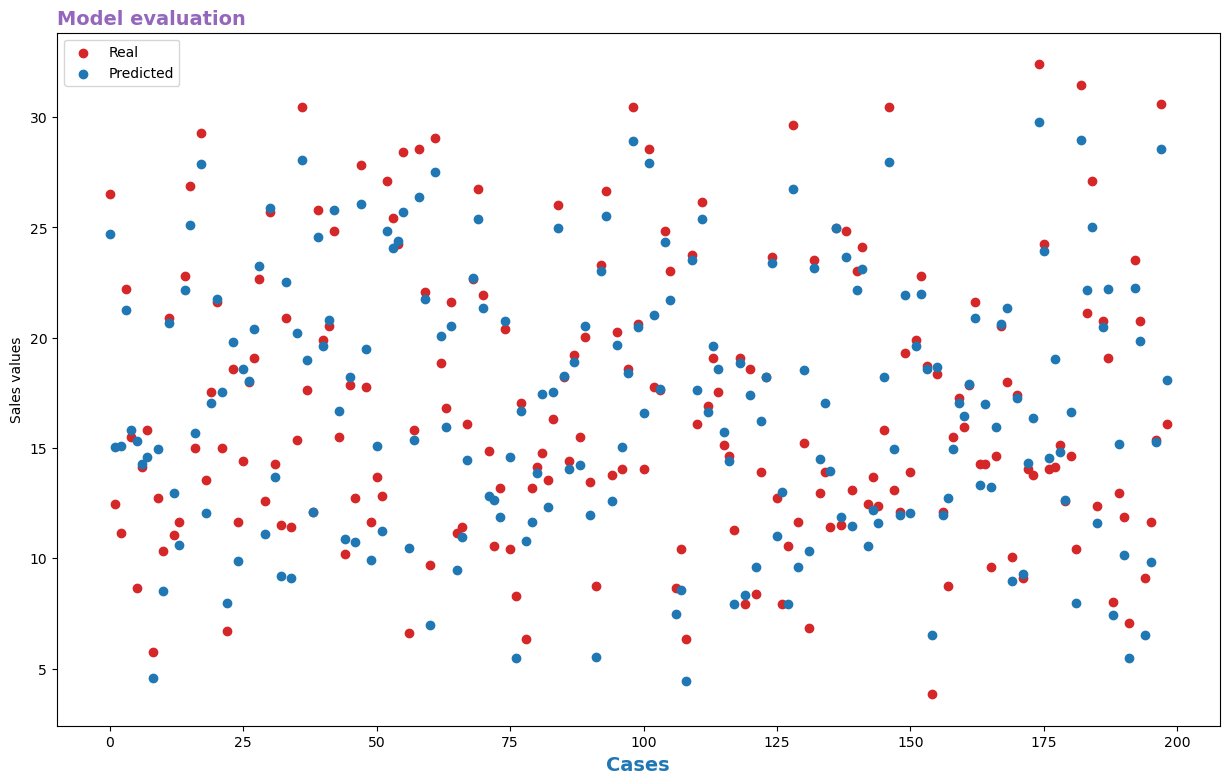

In [38]:
# PREDICTION
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, ynews, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Sales values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

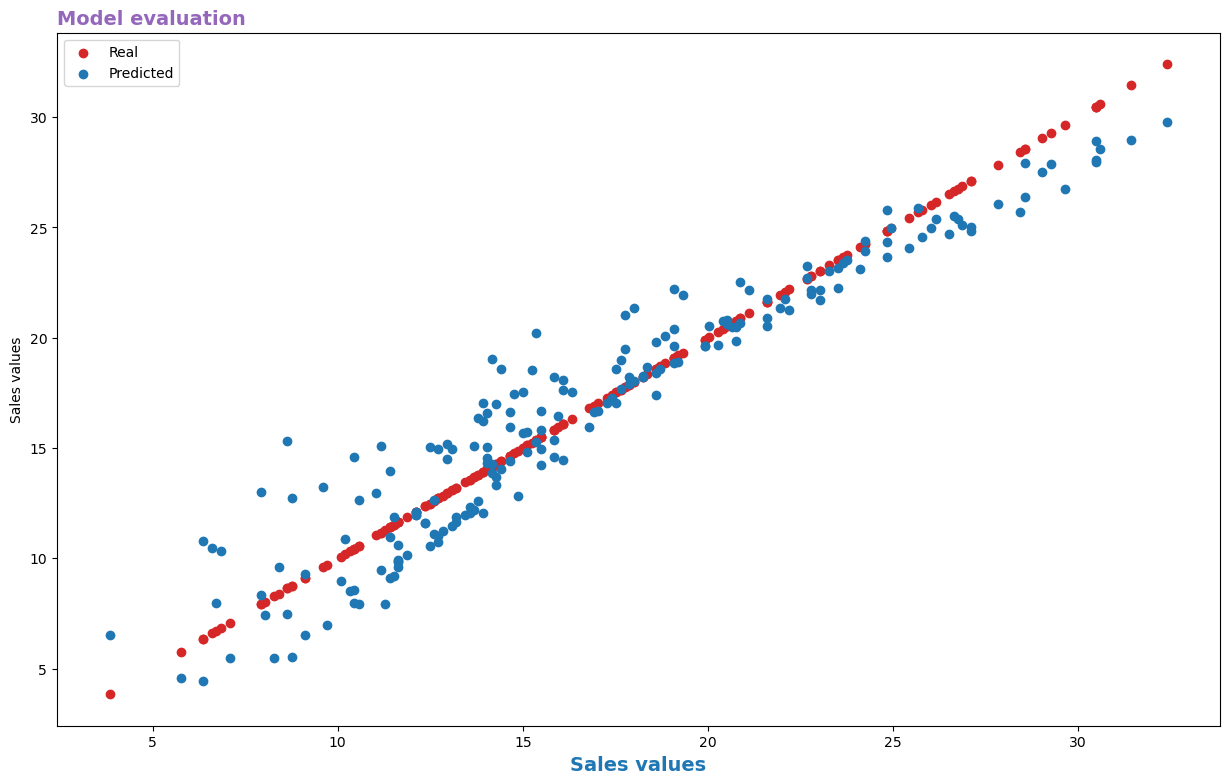

In [39]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(ynews, ynews, color = 'tab:red', label='Real')
ax.scatter(ynews, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Sales values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Sales values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

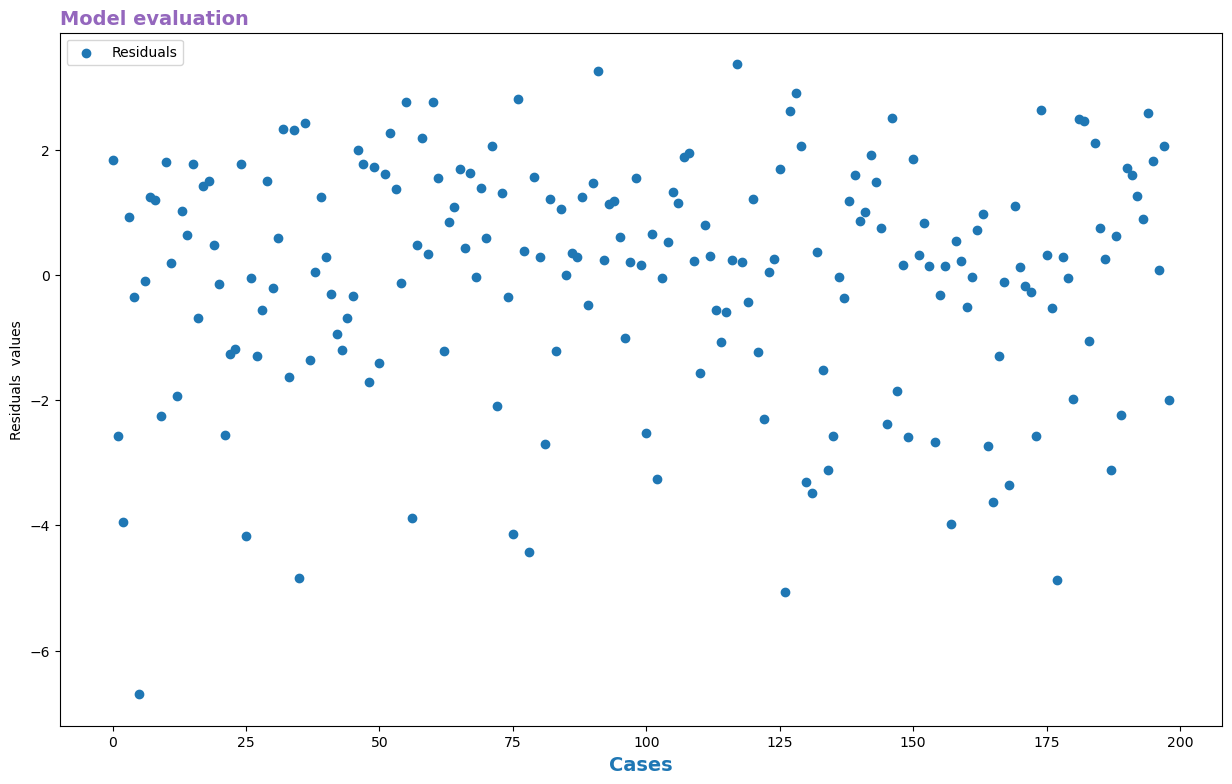

In [40]:
# Residuals
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(ynews)))

#ax.scatter(x_axis, ynews, color = 'tab:red', label='Real')
ax.scatter(x_axis, residuals_train, color = 'tab:blue', label='Residuals')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Residuals  values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()